In [1]:
api_token = {"username":"yoonasheng","key":"5a1b76c6276b6464b07984bf02057d2e"}
import json
import zipfile
import os
 
if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")
 
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json
 
if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')
!kaggle datasets download -d puneet6060/intel-image-classification --force
!ls /kaggle

 98% 341M/346M [00:03<00:00, 119MB/s] 
100% 346M/346M [00:03<00:00, 107MB/s]
intel-image-classification.zip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
%matplotlib inline

import cv2
import os
import glob

from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from tqdm import tqdm
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img

from tensorflow.keras import layers,Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense
from tensorflow.keras.layers import GlobalMaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

# <font color = purple>Construct a file to store data</font>

In [3]:
! mkdir intel

# <font color = purple>Unzip the file</font>

In [4]:
! unzip intel-image-classification.zip -d intel

串流輸出內容已截斷至最後 5000 行。
  inflating: intel/seg_train/seg_train/mountain/7506.jpg  
  inflating: intel/seg_train/seg_train/mountain/7537.jpg  
  inflating: intel/seg_train/seg_train/mountain/7539.jpg  
  inflating: intel/seg_train/seg_train/mountain/7551.jpg  
  inflating: intel/seg_train/seg_train/mountain/7560.jpg  
  inflating: intel/seg_train/seg_train/mountain/7565.jpg  
  inflating: intel/seg_train/seg_train/mountain/7578.jpg  
  inflating: intel/seg_train/seg_train/mountain/7581.jpg  
  inflating: intel/seg_train/seg_train/mountain/7586.jpg  
  inflating: intel/seg_train/seg_train/mountain/7647.jpg  
  inflating: intel/seg_train/seg_train/mountain/7652.jpg  
  inflating: intel/seg_train/seg_train/mountain/7654.jpg  
  inflating: intel/seg_train/seg_train/mountain/7662.jpg  
  inflating: intel/seg_train/seg_train/mountain/767.jpg  
  inflating: intel/seg_train/seg_train/mountain/7672.jpg  
  inflating: intel/seg_train/seg_train/mountain/7679.jpg  
  inflating: intel/seg_train/seg_tra

In [ ]:
# Input data files are available in the "../input/" directory.
Input_path = "intel"
Input_kind = "intel/seg_train/seg_train"

# List the files in the input directory.
print(os.listdir(Input_path))
print(os.listdir(Input_kind))

['seg_pred', 'seg_test', 'seg_train']
['sea', 'forest', 'street', 'mountain', 'buildings', 'glacier']


# <font color = purple>Each kind of training data</font>

In [ ]:
train_buildings = "intel/seg_train/seg_train/buildings/"
train_street = "intel/seg_train/seg_train/street/"
train_mountain = "intel/seg_train/seg_train/mountain/"
train_glacier = "intel/seg_train/seg_train/glacier/"
train_sea = "intel/seg_train/seg_train/sea/"
train_forest = "intel/seg_train/seg_train/forest/"

In [ ]:
test_buildings = "intel/seg_test/seg_test/buildings/"
test_street = "intel/seg_test/seg_test/street/"
test_mountain = "intel/seg_test/seg_test/mountain/"
test_glacier = "intel/seg_test/seg_test/glacier/"
test_sea = "intel/seg_test/seg_test/sea/"
test_forest = "intel/seg_test/seg_test/forest/"

In [ ]:
print("Amount of images in training data:")

print("Buildings :",len(os.listdir(train_buildings)))
print("Street: ",len(os.listdir(train_street)))
print("Mountain:",len(os.listdir(train_mountain)))
print("Glacier: ",len(os.listdir(train_glacier)))
print("Sea: ",len(os.listdir(train_sea)))
print("Forest: ",len(os.listdir(train_forest)))

print()

print("Amount of images in test data:")

print("Buildings :",len(os.listdir(test_buildings)))
print("Street: ",len(os.listdir(test_street)))
print("Mountain:",len(os.listdir(test_mountain)))
print("Glacier: ",len(os.listdir(test_glacier)))
print("Sea: ",len(os.listdir(test_sea)))
print("Forest: ",len(os.listdir(test_forest)))

Amount of images in training data:
Buildings : 2191
Street:  2382
Mountain: 2512
Glacier:  2404
Sea:  2274
Forest:  2271

Amount of images in test data:
Buildings : 437
Street:  501
Mountain: 525
Glacier:  553
Sea:  510
Forest:  474


# <font color = purple>Compose training and test data</font>

In [ ]:
images = []
labels = []
def dataset_create(data,label):
  for i in tqdm(os.listdir(data)):
    path = os.path.join(data,i)
    try:
      img = cv2.imread(path)
      img = cv2.resize(img,(150,150))
    except:
      continue  
    images.append(img)
    labels.append(label)
  return(images,labels)

In [ ]:
images,labels = dataset_create(train_buildings,"buildings")
images,labels = dataset_create(train_street,"street")
images,labels = dataset_create(train_mountain,"mountain")
images,labels = dataset_create(train_glacier,"glacier")
images,labels = dataset_create(train_sea,"sea")
images,labels = dataset_create(train_forest,"forest")

100%|██████████| 2271/2271 [00:01<00:00, 1627.31it/s]


In [ ]:
images,labels = dataset_create(test_buildings,"buildings")
images,labels = dataset_create(test_street,"street")
images,labels = dataset_create(test_mountain,"mountain")
images,labels = dataset_create(test_glacier,"glacier")
images,labels = dataset_create(test_sea,"sea")
images,labels = dataset_create(test_forest,"forest")

100%|██████████| 474/474 [00:00<00:00, 1693.90it/s]


In [ ]:
images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)

(17034, 150, 150, 3)
(17034,)


<function matplotlib.pyplot.show>

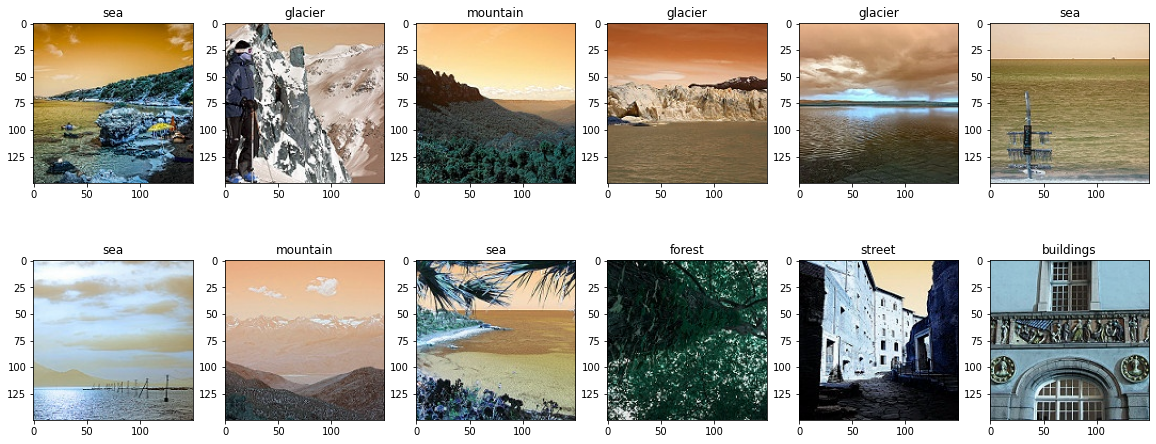

In [ ]:
plt.figure(figsize = (20,8))
for i in range (12):
    num = random.randint(0,len(images)-1)
    plt.subplot(2,6,i+1)
    plt.imshow(images[num])
    plt.title(labels[num])
plt.show

In [ ]:
# Find the kind and amount of data
unique,counts = np.unique(labels,return_counts=True)
print(unique,counts)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street'] [2628 2745 2957 3037 2784 2883]


# <font color = purple>Split training and test data</font>

In [ ]:
def y_label(y):
  label_categories = {'buildings': 0,
             'forest': 1,
             'glacier': 2,
             'mountain': 3,
             'sea': 4,
             'street': 5}
  y = [label_categories[k] for k in y]
  return y

x_train,x_test,y_train,y_test = train_test_split(images,labels,test_size = 0.2,random_state = 107201548)

# transform word to number
y_train = y_label(y_train)
y_test = y_label(y_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print("x_train's shape: ",x_train.shape)
print("x_test's shape: ",x_test.shape)
print("y_train's shape: ",y_train.shape)
print("y_test's shape: ",y_test.shape)

x_train's shape:  (13627, 150, 150, 3)
x_test's shape:  (3407, 150, 150, 3)
y_train's shape:  (13627,)
y_test's shape:  (3407,)


In [ ]:
from tensorflow.keras.applications import VGG16
preprocess_input = tf.keras.applications.vgg16.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
base_model = tf.keras.applications.VGG16(input_shape=(150,150,3),
                      include_top=False,
                      weights='imagenet')

In [ ]:
base_model.trainable = False

In [ ]:
last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output

model = layers.Flatten()(last_output)
model = layers.Dropout(0.15)(model)
model = layers.Dense(512, activation='relu')(model)
model = layers.Dropout(0.15)(model)
model = layers.Dense(64, activation='relu')(model)
model = layers.Dropout(0.15)(model)                  
model = layers.Dense(6, activation='softmax')(model)           

model_vgg = Model(base_model.input,model) 

base_learning_rate = 0.0001
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

In [ ]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
loss0, accuracy0 = model_vgg.evaluate(x_test,y_test)

107/107 [==============================] - 11s 72ms/step - loss: 10.3954 - accuracy: 0.2172


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 10.75
initial accuracy: 0.21


In [ ]:
initial_epochs = 10

history = model_vgg.fit(x_train,y_train,
             epochs=1,
             validation_data=(x_test,y_test))

426/426 [==============================] - 40s 93ms/step - loss: 1.3274 - accuracy: 0.7859 - val_loss: 0.4113 - val_accuracy: 0.8665


In [ ]:
history = model_vgg.fit(x_train,y_train,
             epochs=10,
             validation_data=(x_test,y_test))

Epoch 1/10
426/426 [==============================] - 37s 88ms/step - loss: 0.4427 - accuracy: 0.8683 - val_loss: 0.3699 - val_accuracy: 0.8914
Epoch 2/10
426/426 [==============================] - 37s 87ms/step - loss: 0.3098 - accuracy: 0.8984 - val_loss: 0.3332 - val_accuracy: 0.8990
Epoch 3/10
426/426 [==============================] - 38s 89ms/step - loss: 0.2527 - accuracy: 0.9137 - val_loss: 0.3435 - val_accuracy: 0.9014
Epoch 4/10
426/426 [==============================] - 37s 88ms/step - loss: 0.2090 - accuracy: 0.9273 - val_loss: 0.3470 - val_accuracy: 0.9087
Epoch 5/10
426/426 [==============================] - 38s 88ms/step - loss: 0.1820 - accuracy: 0.9363 - val_loss: 0.3664 - val_accuracy: 0.9093
Epoch 6/10
426/426 [==============================] - 38s 89ms/step - loss: 0.1568 - accuracy: 0.9422 - val_loss: 0.3636 - val_accuracy: 0.9131
Epoch 7/10
426/426 [==============================] - 38s 88ms/step - loss: 0.1410 - accuracy: 0.9498 - val_loss: 0.3868 - val_accuracy:

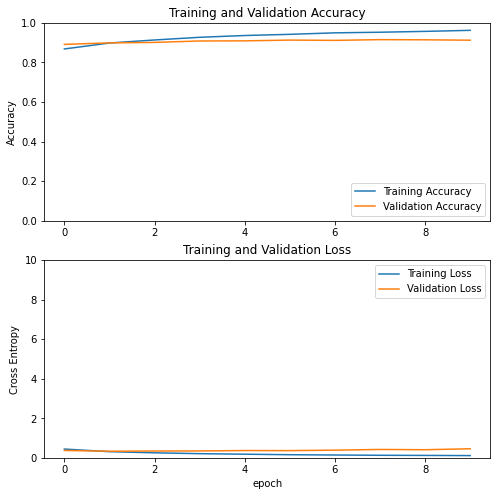

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,10.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune = 14

# Freeze all the layers before the `fine_tune` layer
for layer in base_model.layers[:fine_tune]:
  layer.trainable = False

Number of layers in the base model:  19


In [ ]:
model_vgg.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
          loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
          metrics=['accuracy'])

In [ ]:
model_vgg.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
fine_tune_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model_vgg.fit(x_train,y_train,
                epochs = total_epochs,
                initial_epoch = initial_epochs,
                validation_data = (x_test, y_test))

Epoch 11/20
426/426 [==============================] - 44s 102ms/step - loss: 0.3938 - accuracy: 0.8887 - val_loss: 0.3105 - val_accuracy: 0.9040
Epoch 12/20
426/426 [==============================] - 43s 102ms/step - loss: 0.2397 - accuracy: 0.9190 - val_loss: 0.3095 - val_accuracy: 0.8952
Epoch 13/20
426/426 [==============================] - 43s 102ms/step - loss: 0.1949 - accuracy: 0.9307 - val_loss: 0.3056 - val_accuracy: 0.9081
Epoch 14/20
426/426 [==============================] - 44s 102ms/step - loss: 0.1782 - accuracy: 0.9366 - val_loss: 0.3411 - val_accuracy: 0.9040
Epoch 15/20
426/426 [==============================] - 43s 102ms/step - loss: 0.1512 - accuracy: 0.9475 - val_loss: 0.4138 - val_accuracy: 0.8920
Epoch 16/20
426/426 [==============================] - 43s 101ms/step - loss: 0.1593 - accuracy: 0.9478 - val_loss: 0.2999 - val_accuracy: 0.9228
Epoch 17/20
426/426 [==============================] - 43s 102ms/step - loss: 0.0991 - accuracy: 0.9638 - val_loss: 0.3007 -

In [ ]:
results = model_vgg.evaluate(x_test, y_test, verbose=2)
results

107/107 - 7s - loss: 0.3331 - accuracy: 0.9301


[0.3330935835838318, 0.9301438331604004]

In [ ]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

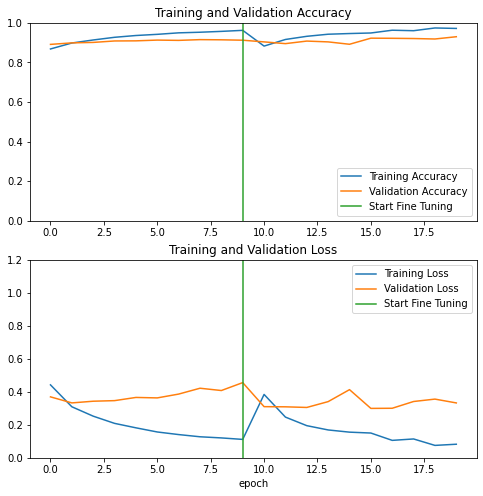

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
      plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.2])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
label = ['buildings','forest','glacier','mountain','sea','street']

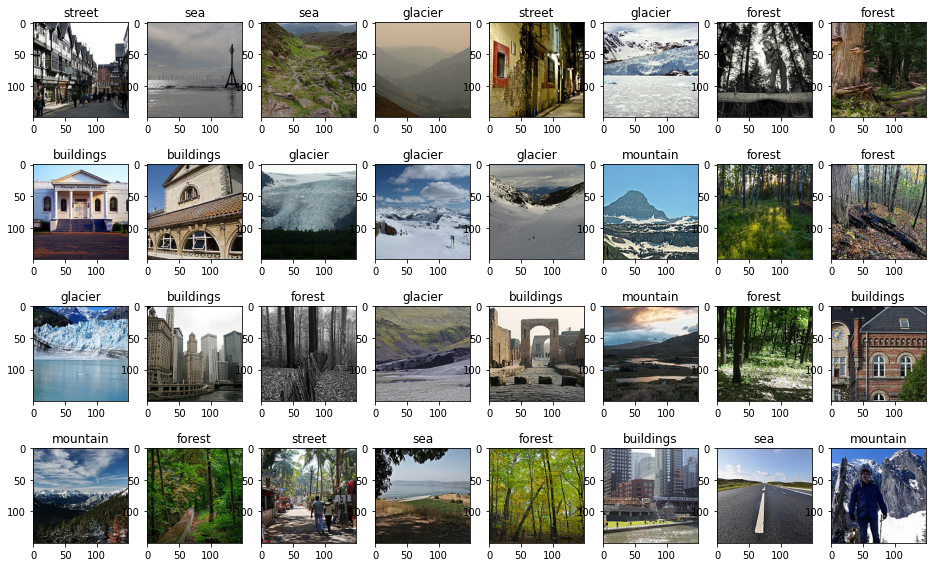

In [ ]:
plt.figure(figsize=(16,10))
pre = os.listdir('intel/seg_pred/seg_pred/')
for i in range (32):
  imgname = random.choice(pre)
  img = load_img('intel/seg_pred/seg_pred/{}'.format(str(imgname))) 
  img_np = np.expand_dims(img,axis = 0)
  pre_num = model_vgg.predict(img_np)
  pre_num = np.argmax(pre_num,axis = 1)
  pre_num = label[int(pre_num)]

  plt.subplot(4,8,i+1)
  plt.imshow(img)
  plt.title(pre_num)
plt.show()